In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
"""
Load UCI ML Iris data
Return: data(shape = (150, 4)) and labels(shape = (150, 1)) in numpy array(rank 2)
"""
def load_data(classes):
    data = pd.read_csv('Iris.csv', index_col=0).as_matrix()
    features = data[:, :-1]
    labels = data[:, -1].reshape(-1, 1)
    for class_id in classes:
        labels[labels == class_id[0]] = class_id[1]
    return features.astype(np.float32), labels.astype(np.float32)

In [3]:
"""
Initialize the clusters' coordinate with the first sample from each class
Return: initialized clusters' coordinate
"""
def cluster_init(features, labels, k):
    clusters = np.empty((k, features.shape[1]), dtype=np.float32)
    for i in range(k):
        clusters[i] = features[np.squeeze(labels == float(i))][0]
    return clusters

In [4]:
"""
Perform k-means
"""
def k_means(features, clusters, k, converge_diff):
    diff_history = list()
    num_data = features.shape[0]
    dim = features.shape[1]
    diff = converge_diff + 10e-6
    clus_feat_diff = np.zeros((k, num_data), dtype=np.float32)
    epoch_counter = 0
    while diff > converge_diff:
        pre_clusters = np.copy(clusters)
        for i in range(k):
            clus_feat_diff[i] = np.linalg.norm(np.tile(clusters[i].reshape(1, dim), (num_data, 1)) - features, axis=1)
        nearest_cluster = np.argmin(clus_feat_diff, axis=0)
        for i in range(k):
            clusters[i] = np.average(features[nearest_cluster == i], axis=0)
        diff = np.average(np.linalg.norm(clusters - pre_clusters, axis=1))
        diff_history.append(diff)
        epoch_counter += 1
        print('Epoch {}, Average Distance Difference(with previous clusters): {}'.format(epoch_counter, diff))
    return clusters, diff_history, nearest_cluster

In [5]:
"""
Plot the history of average distance difference
"""
def plot_avg_diff(diff_history):
    plt.plot(list(range(1, len(diff_history) + 1)), diff_history, label='avg distance difference')
    plt.title('Average Distance Difference of Clusters - Epoch')
    plt.legend(loc='best')
    plt.show()

In [6]:
"""
Plot the scatter graphs with clusters
"""
def plot_scatter(features, labels, clusters, nearest_cluster):
    num_features = features.shape[1]
    for i in range(num_features - 1):
        for j in range(i + 1, num_features):
            plt.plot(clusters[0][i], clusters[0][j], 'ro', label='Cluster 0(C0)')
            plt.plot(clusters[1][i], clusters[1][j], 'go', label='Cluster 1(C1)')
            plt.plot(clusters[2][i], clusters[2][j], 'bo', label='Cluster 2(C2)')
            plt.plot(features[nearest_cluster == 0][:, i], features[nearest_cluster == 0][:, j], 'r+', label='Samples near C0')
            plt.plot(features[nearest_cluster == 1][:, i], features[nearest_cluster == 1][:, j], 'g+', label='Samples near C1')
            plt.plot(features[nearest_cluster == 2][:, i], features[nearest_cluster == 2][:, j], 'b+', label='Samples near C2')
            plt.title('x{} - x{} with clusters'.format(i + 1, j + 1))
            plt.legend(loc='best')
            plt.show()

In [7]:
"""
Settings
"""
classes = [('Iris-setosa', 0), ('Iris-versicolor', 1), ('Iris-virginica', 2)]
converge_diff = 0.01
k = 3

Initial coordinate of Cluster 0: [5.1 3.5 1.4 0.2]
Initial coordinate of Cluster 1: [7.  3.2 4.7 1.4]
Initial coordinate of Cluster 2: [6.3 3.3 6.  2.5]

Epoch 1, Average Distance Difference(with previous clusters): 0.6643375754356384
Epoch 2, Average Distance Difference(with previous clusters): 0.1411137729883194
Epoch 3, Average Distance Difference(with previous clusters): 0.020745761692523956
Epoch 4, Average Distance Difference(with previous clusters): 0.0

Final coordinate of Cluster 0: [5.0059996  3.4180002  1.464      0.24399997]
Final coordinate of Cluster 1: [5.901613  2.7483873 4.393549  1.4338712]
Final coordinate of Cluster 2: [6.849999  3.0736842 5.742105  2.0710528]



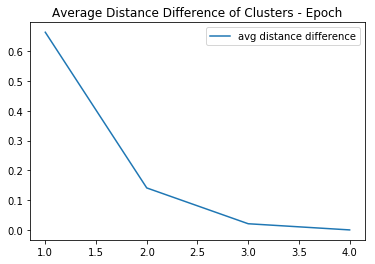

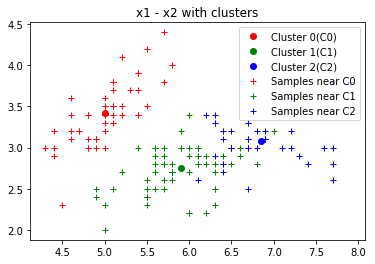

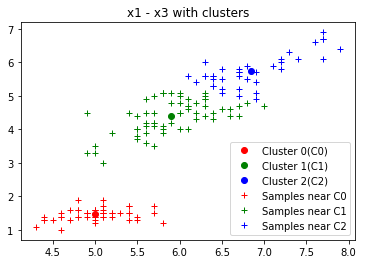

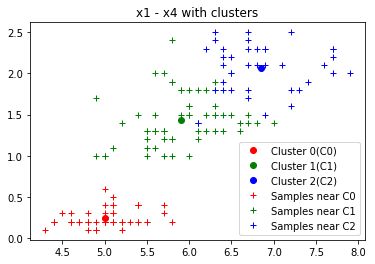

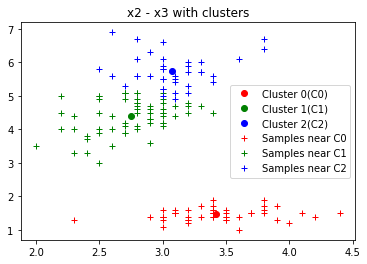

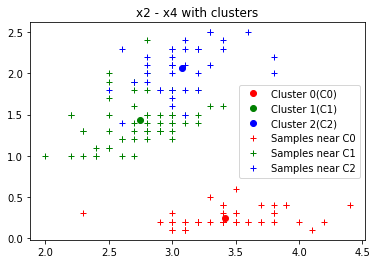

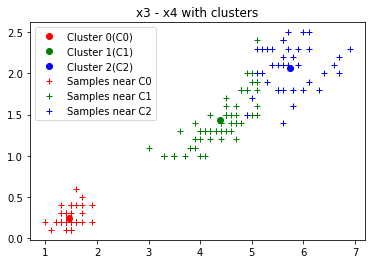

Data points in Cluster 0: 50
Data points in Cluster 1: 62
Data points in Cluster 2: 38

Votes for Cluster 0:
Label Class 0: 50
Cluster 0 belongs to the Label Class 0 with majority vote 50/50

Votes for Cluster 1:
Label Class 1: 48
Label Class 2: 14
Cluster 1 belongs to the Label Class 1 with majority vote 48/62

Votes for Cluster 2:
Label Class 1: 2
Label Class 2: 36
Cluster 2 belongs to the Label Class 2 with majority vote 36/38

Final coordinate of Class Labeled Cluster 0: [5.0059996  3.4180002  1.464      0.24399997]
Final coordinate of Class Labeled Cluster 1: [5.901613  2.7483873 4.393549  1.4338712]
Final coordinate of Class Labeled Cluster 2: [6.849999  3.0736842 5.742105  2.0710528]

16 of data samples are placed in wrong clusters


In [8]:
features, labels = load_data(classes)
clusters = cluster_init(features, labels, k)
for i in range(k):
    print('Initial coordinate of Cluster {}: {}'.format(i, clusters[i]))
print()
clusters, diff_history, nearest_cluster = k_means(features, clusters, k, converge_diff)
print()
for i in range(k):
    print('Final coordinate of Cluster {}: {}'.format(i, clusters[i]))
print()
plot_avg_diff(diff_history)
plot_scatter(features, labels, clusters, nearest_cluster)
for i in range(k):
    print('Data points in Cluster {}: {}'.format(i, np.sum((nearest_cluster == i).astype(int))))
print()
labeled_clusters = np.zeros_like(clusters)
for i in range(k):
    possible_label, majority_vote = np.unique(labels[nearest_cluster == i], return_counts=True)
    cluster_label = int(possible_label[np.argmax(majority_vote)])
    labeled_clusters[cluster_label] = clusters[i]
    print('Votes for Cluster {}:'.format(i))
    for j in range(possible_label.shape[0]):
        print('Label Class {}: {}'.format(int(possible_label[j]), majority_vote[j]))
    print('Cluster {} belongs to the Label Class {} with majority vote {}/{}'.format(i, cluster_label, np.amax(majority_vote), np.sum(majority_vote)))
    print()
for i in range(k):
    print('Final coordinate of Class Labeled Cluster {}: {}'.format(i, labeled_clusters[i]))
print()
print('{} of data samples are placed in wrong clusters'.format(np.sum(1 - (nearest_cluster == np.squeeze(labels)).astype(int))))